<a href="https://colab.research.google.com/github/yuliyaosipava/CLustering_on_Python/blob/main/Clustering_pycaret1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FACtor_2022.xlsx to FACtor_2022 (2).xlsx


In [ ]:
df = pd.read_excel('FACtor_2022.xlsx')
df

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,99.500738,107.0,85.3,107.0,112.4,8.1,6.793348,8.330946,37.7,164.149785,...,14.603817,102.273173,20.297137,92.5,38.251880,19.592250,38.233806,6.875434,4.528955,2.020315
1,100.354444,94.1,92.6,99.7,102.5,12.3,4.645695,5.422105,33.7,109.326005,...,4.850043,103.520867,27.329906,98.8,24.077121,8.894602,11.162982,1.494687,1.793916,0.791123
2,99.973298,62.7,92.8,98.3,98.2,9.2,3.616382,4.234682,30.9,142.051812,...,12.250981,110.740682,13.403756,91.9,27.506630,15.450700,14.183304,2.323610,2.902321,1.064345
3,98.939330,91.3,78.6,97.6,101.6,6.4,4.136628,6.133280,36.3,67.097095,...,5.368532,102.252303,3.838702,84.2,9.348511,8.961008,18.642932,1.332687,1.551263,0.764511
4,98.958732,95.9,102.9,99.9,104.5,12.3,8.421045,9.003137,35.4,152.002488,...,4.422446,100.066247,4.665534,90.3,14.711223,8.464152,26.753456,2.626611,3.503749,1.504217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,96.954207,99.4,60.2,95.2,97.1,1.3,18.107833,22.330074,31.7,116.196799,...,4.599371,100.408893,8.375696,90.2,4.639716,10.247720,41.128863,2.187767,1.197692,1.690390
114,98.645541,113.2,110.2,97.4,99.6,-19.5,7.343052,7.343052,37.3,91.719960,...,3.948567,97.330161,1.275691,86.7,4.606662,11.136985,42.083629,2.152374,1.452263,1.674598
115,97.043847,90.6,91.0,98.4,100.9,5.8,4.956641,5.146249,33.8,49.426934,...,7.961783,99.444444,5.107337,90.2,10.757254,13.446568,41.854801,2.461548,0.784324,1.080385
116,97.335589,46.9,50.1,98.0,100.0,-10.6,3.712654,3.884007,29.9,59.480760,...,4.297310,96.182424,3.079739,81.7,7.766990,9.867898,24.400764,2.104966,0.539790,1.610377


In [ ]:
df = df.filter(regex='^(?!.*Unnamed).*$')
df.head()

,"Average employment of the population for the period, %",Podrjad,INVEST,Real,retail,rentab,Coeff vvoda,Coeff obn,Obespech,Vvod,...,SME,Housing stock,PP na 1 person,Accepted/fired,Vyru4ka,Organiz,Agriculture lands,Vegetables,Milk,KRS
0,99.500738,107.0,85.3,107.0,112.4,8.1,6.793348,8.330946,37.7,164.149785,...,14.603817,102.273173,20.297137,92.5,38.251880,19.592250,38.233806,6.875434,4.528955,2.020315
1,100.354444,94.1,92.6,99.7,102.5,12.3,4.645695,5.422105,33.7,109.326005,...,4.850043,103.520867,27.329906,98.8,24.077121,8.894602,11.162982,1.494687,1.793916,0.791123
2,99.973298,62.7,92.8,98.3,98.2,9.2,3.616382,4.234682,30.9,142.051812,...,12.250981,110.740682,13.403756,91.9,27.506630,15.450700,14.183304,2.323610,2.902321,1.064345
3,98.939330,91.3,78.6,97.6,101.6,6.4,4.136628,6.133280,36.3,67.097095,...,5.368532,102.252303,3.838702,84.2,9.348511,8.961008,18.642932,1.332687,1.551263,0.764511
4,98.958732,95.9,102.9,99.9,104.5,12.3,8.421045,9.003137,35.4,152.002488,...,4.422446,100.066247,4.665534,90.3,14.711223,8.464152,26.753456,2.626611,3.503749,1.504217


In [ ]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled


In [ ]:
df_scaled = preprocessing.scale(df)

In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

If pycaret does not work- install neccessary modules


In [ ]:
!pip install imblearn

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 52.0 MB/s eta 0:00:00


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install --upgrade threadpoolctl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
mpl.rcParams['figure.dpi'] = 300
import sklearn

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5

In [ ]:
!pip install matplotlib scikit-learn

In [ ]:
!pip install --upgrade pycaret


In [ ]:
from pycaret.clustering import *

In [ ]:
cluster = setup(df_scaled, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(118, 27)"
2,Transformed data shape,"(118, 27)"
3,Numeric features,27
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0917,11.9646,2.1851,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

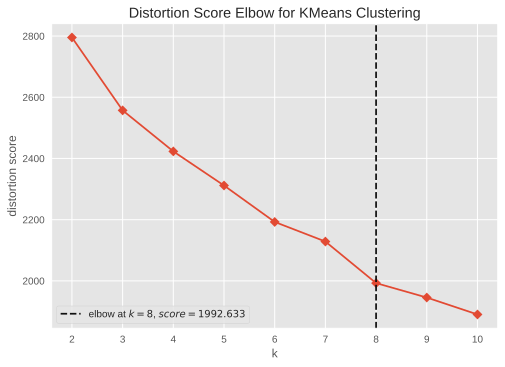

In [ ]:
plot_model(model, 'elbow')

In [ ]:
model = create_model('kmeans', num_clusters = 8)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0642,9.4111,1.9940,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plot_model(model, 'cluster')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
pca=PCA(n_components=4)
principalComponents=pca.fit_transform(df_scaled)
#Plot the expained variaces
#Save components to a dataframe
PCA_components=pd.DataFrame(principalComponents)

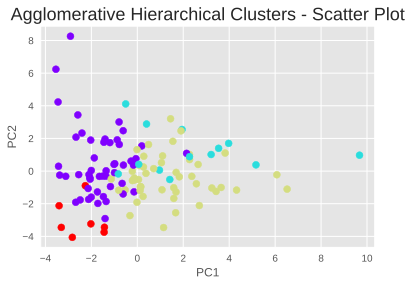

In [ ]:
#Plot scatter plot
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 4))
plt.scatter(PCA_components[0],PCA_components[1], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

In [ ]:
save_model(model, 'clustering_model')
results = assign_model(model)
results.head(10)

Transformation Pipeline and Model Successfully Saved


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,Cluster
0,0.935557,0.396532,-0.180158,1.289206,1.805253,0.037800,0.354066,0.530966,0.540957,1.145376,...,0.134705,0.540713,0.146388,0.640122,1.744767,1.200862,3.013847,1.847038,0.946250,Cluster 7
1,1.518333,-0.239038,0.111659,0.008179,0.145227,0.761117,-0.117785,-0.082147,-0.326928,-0.052367,...,0.428980,1.077928,1.331845,0.021300,-0.656468,-1.261306,-0.595289,-0.179398,-0.577783,Cluster 0
2,1.258147,-1.786087,0.119654,-0.237497,-0.575794,0.227240,-0.343931,-0.332427,-0.934448,0.662598,...,2.131808,0.014145,0.033487,0.171021,0.815139,-0.986599,-0.039289,0.641838,-0.239024,Cluster 0
3,0.552317,-0.376992,-0.447990,-0.360335,-0.005684,-0.254970,-0.229630,0.067751,0.237198,-0.974949,...,0.129783,-0.716505,-1.415405,-0.621702,-0.641562,-0.580983,-0.703950,-0.359184,-0.610777,Cluster 1
4,0.565562,-0.150354,0.523400,0.043276,0.480586,0.761117,0.711680,0.672648,0.041923,0.879992,...,-0.385809,-0.653346,-0.267581,-0.387584,-0.753088,0.156692,0.163949,1.087446,0.306359,Cluster 7
5,-1.619598,-2.702492,0.923149,1.078627,0.950088,1.777203,-0.537826,-0.607494,0.020226,1.028378,...,1.339993,0.432175,1.181311,0.270554,-0.165469,-0.677962,0.076392,0.673277,-0.127048,Cluster 0
6,1.506641,-0.007474,-0.236123,-1.623814,-1.229743,0.675007,-0.038458,-0.064996,0.671140,0.192867,...,0.228503,-0.288633,0.616808,-0.254135,-0.816982,-0.139541,0.197217,1.420363,0.292568,Cluster 7
7,-0.054774,-0.450895,0.279553,-0.237497,-0.005684,-0.289414,-0.384801,-0.324842,-0.261837,-0.564617,...,-0.033623,-0.331094,0.071121,-0.289527,-0.647348,-0.660546,-0.515669,0.330540,-0.165871,Cluster 0
8,-0.548172,0.416240,0.655317,0.288952,0.665033,1.191662,0.585499,0.705923,-0.131654,-0.785123,...,0.046071,1.597186,1.181311,1.325547,0.170998,0.427153,1.360644,2.027480,0.726314,Cluster 7
9,1.466520,0.293067,-0.412012,-0.395432,-0.391347,0.709451,0.133127,0.145066,-0.218442,-0.061783,...,0.816936,0.045126,0.278106,-0.056398,-0.157061,-1.121791,-0.670634,-0.220279,-0.662338,Cluster 0
